<a href="https://colab.research.google.com/github/rezakhanahmadi342341/projects/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import kagglehub
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
kagglehub.login('/content/kaggle.json')
!kaggle datasets download -d dev0914sharma/customer-clustering
!unzip customer-clustering.zip

In [178]:
data = pd.read_csv('/content/segmentation data.csv')

In [179]:
data = data.drop('ID', axis=1)

In [180]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [181]:
data.duplicated().sum()

0

In [182]:
data.isnull().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [184]:
onehotcolumns = data[['Sex', 'Marital status','Occupation']]
data = data.drop(['Sex', 'Marital status','Occupation'], axis=1)
onehot = OneHotEncoder()
onehot.fit(onehotcolumns)
onehotcolumns = onehot.transform(onehotcolumns).toarray()
onehotcolumns = pd.DataFrame(onehotcolumns, columns= onehot.get_feature_names_out())

In [185]:
data = pd.concat([data, onehotcolumns],axis=1)
data

,Age,Education,Income,Settlement size,Sex_0,Sex_1,Marital status_0,Marital status_1,Occupation_0,Occupation_1,Occupation_2
0,67,2,124670,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,22,1,150773,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,49,1,89210,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,45,1,171565,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,53,1,149031,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,47,1,123525,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1996,27,1,117744,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1997,31,0,86400,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1998,24,1,97968,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [186]:
pca = PCA(n_components=2)
pca.fit(data)
data = pca.transform(data)

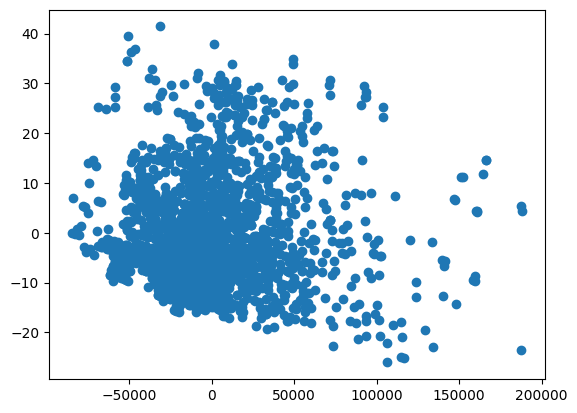

In [187]:
plt.scatter(data[:,0], data[:,1])

In [188]:
def train(model, data):
  model.fit(data)
  pre = model.predict(data)
  score = silhouette_score(data, pre)
  print(score)

models = [
    KMeans(n_clusters=2),
    KMeans(n_clusters=3),
    MeanShift()
]

for i in models:
  result = train(i, data)
  print(i)
  print("-" * 100)

0.5811499866539974
KMeans(n_clusters=2)
----------------------------------------------------------------------------------------------------
0.5115803209648515
KMeans(n_clusters=3)
----------------------------------------------------------------------------------------------------
0.6532117804517359
MeanShift()
----------------------------------------------------------------------------------------------------


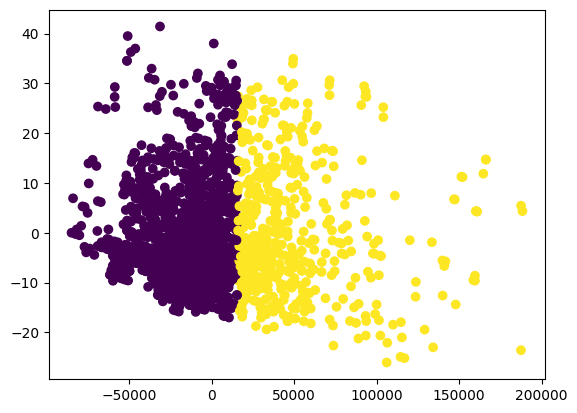

In [189]:
plt.scatter(data[:,0], data[:,1], c=pre)

# MeanShift: **0.6532117804517354**